In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/books.csv', error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [4]:
df.describe(include='all')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714,13714,13714.000000,13714,1.371400e+04,13714,13714.000000,1.371400e+04,13714.000000
unique,NaN,12422,7600,NaN,13714,NaN,30,NaN,NaN,NaN
top,NaN,One Hundred Years of Solitude,Agatha Christie,NaN,1593080239,NaN,eng,NaN,NaN,NaN
freq,NaN,11,69,NaN,1,NaN,10594,NaN,NaN,NaN
mean,22159.859195,NaN,NaN,3.930620,NaN,9.764017e+12,NaN,342.402727,1.776540e+04,533.632128
std,13700.926816,NaN,NaN,0.357893,NaN,3.987679e+11,NaN,252.650165,1.129572e+05,2529.006691
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000
25%,10619.250000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,196.000000,8.300000e+01,7.000000
50%,21321.500000,NaN,NaN,3.960000,NaN,9.780613e+12,NaN,301.000000,6.305000e+02,40.000000
75%,33311.750000,NaN,NaN,4.130000,NaN,9.780940e+12,NaN,421.000000,4.742250e+03,222.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [6]:
df.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

Corrected J.K. Rowling's Name.

In [7]:
df['authors'].nunique()

7599

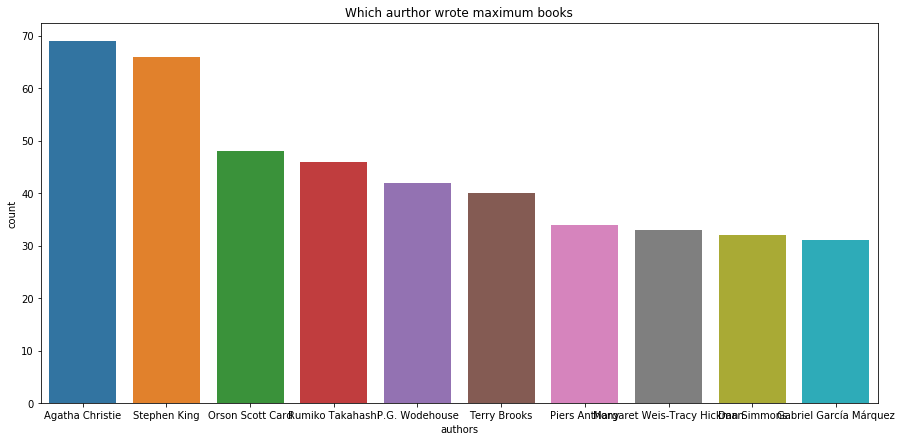

In [8]:
plt.figure(1, figsize=(15, 7))
plt.title("Which aurthor wrote maximum books")
sns.countplot(x = "authors", order=df['authors'].value_counts().index[0:10] ,data=df)

Above Graph shows top 10 authors who have written maximum books

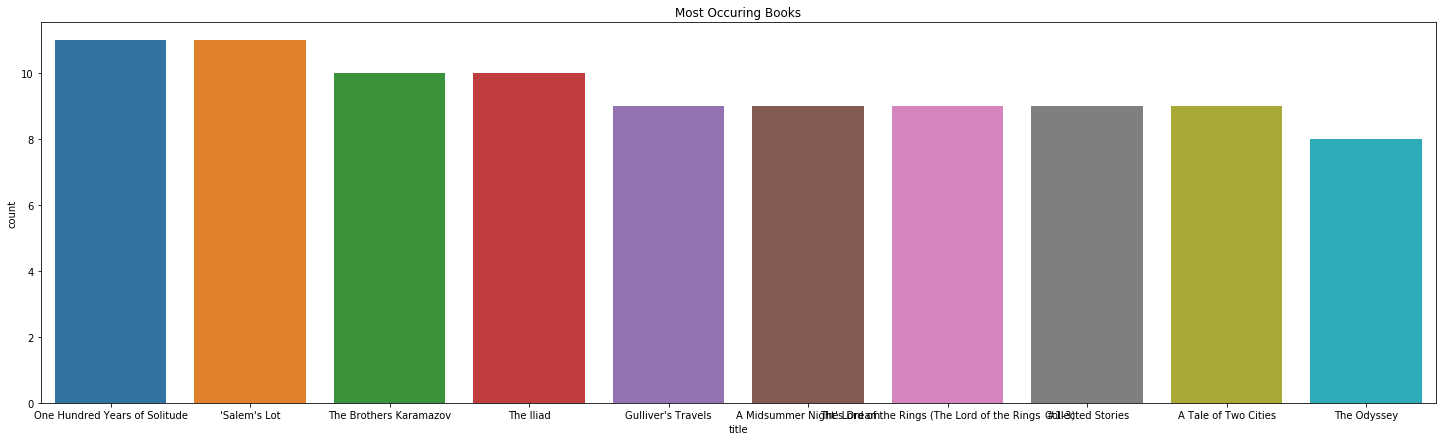

In [9]:
plt.figure(1, figsize=(25,7))
plt.title("Most Occuring Books")
sns.countplot(x = "title", order=df['title'].value_counts().index[0:10] ,data=df)

Above Graph shows the most occuring books in the list. Most of these are old all time classics

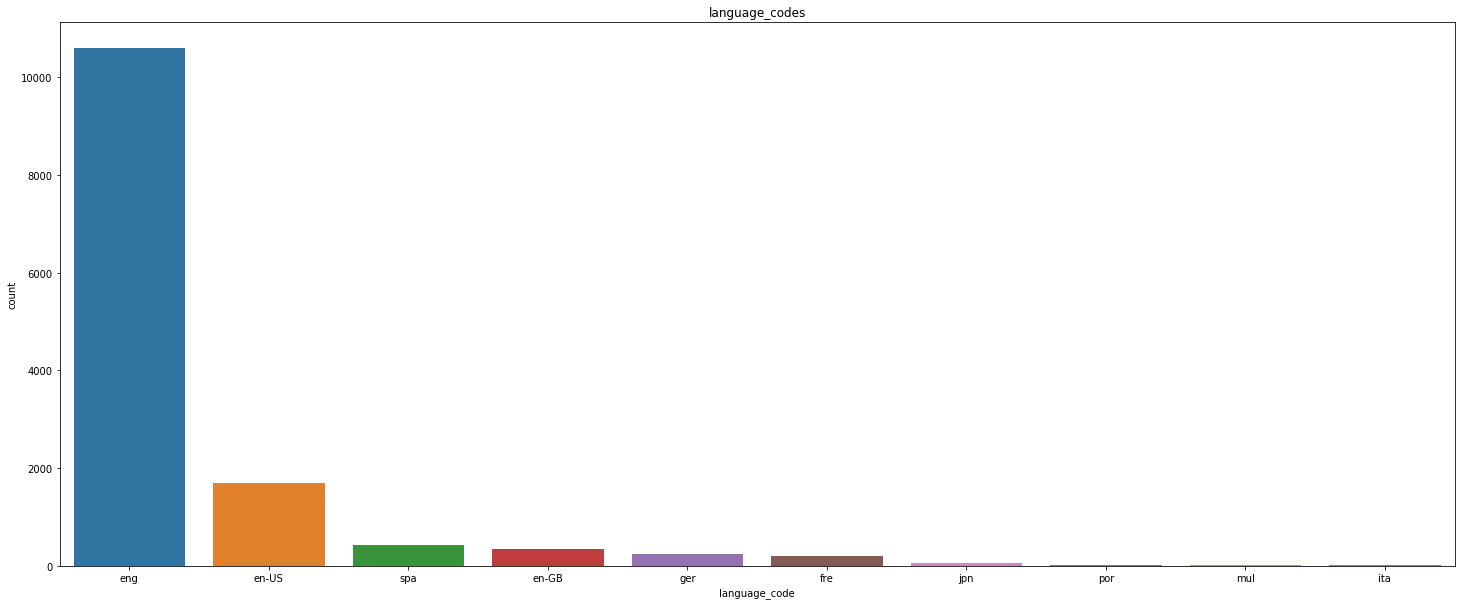

In [10]:
plt.figure(1, figsize=(25,10))
plt.title("language_codes")
sns.countplot(x = "language_code", order=df['language_code'].value_counts().index[0:10] ,data=df)

We infer that english and United States English are the languages most used.

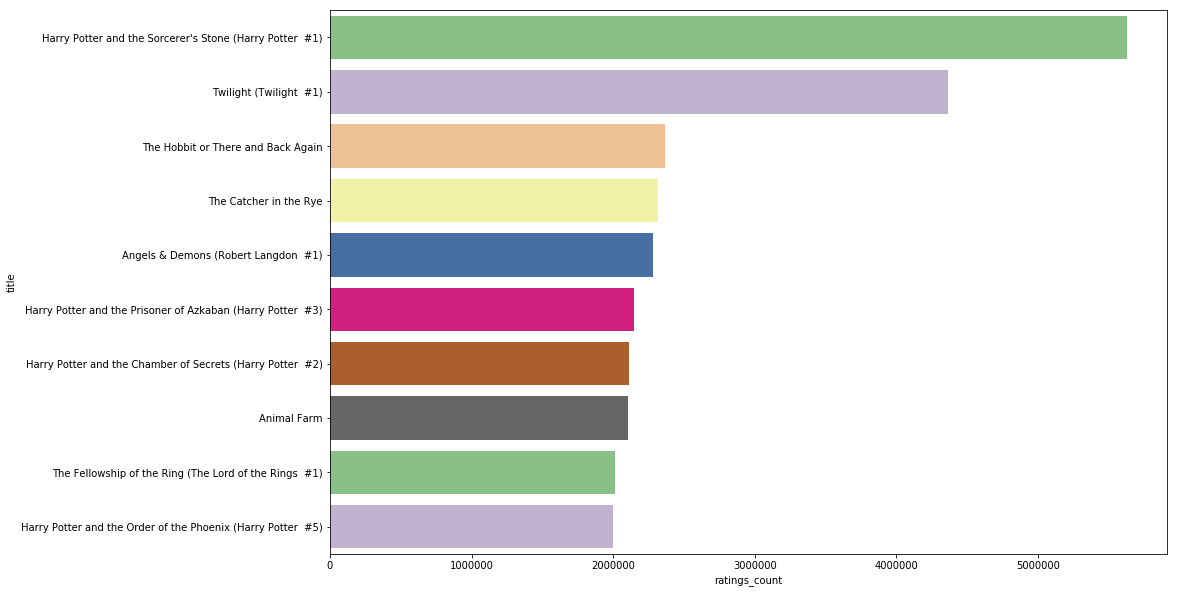

In [11]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Accent')

We see that Harry Potter and the Sorcer's Stone is the most rated book but it has quite a significant difference in ratings with the other parts

The above plot depicts the relation between number of pages in book and average ratings.

In [12]:
most_rated['num_pages']=most_rated['# num_pages']
most_rated=most_rated.drop('# num_pages',axis=1)

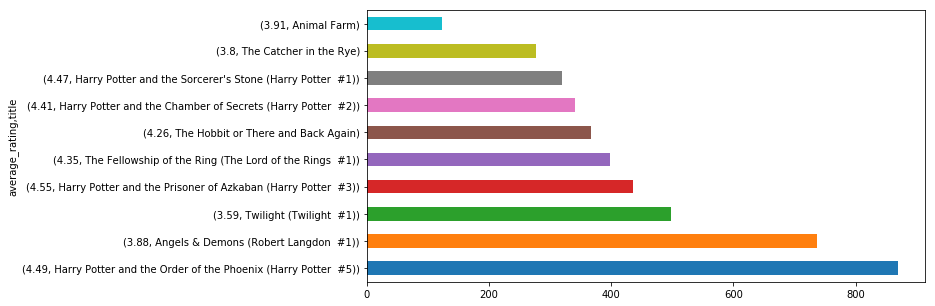

In [13]:
plt.figure(figsize=(10,5))
most_rated.groupby(['average_rating','title']).num_pages.sum().nlargest(10).plot(kind='barh')

The above plot depicts the relation between number of pages in book and average ratings alongwith book title.

In [14]:
df_pages=df['# num_pages'] > 5
df_rating=df['average_rating'] > 4.5
req=pd.DataFrame(df[df_pages & df_rating].sort_values('# num_pages', ascending = True).head(5))
req.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
5811,17279,The Feynman Lectures on Physics Vols 5-6,Richard P. Feynman,4.59,0738202835,9780738202839,en-US,12,22,1
12254,41908,Harry Potter und der Gefangene von Askaban (Ha...,J.K. Rowling-Rufus Beck,4.55,3895849618,9783895849619,ger,13,308,8
8983,28850,The Return of the King (The Lord of the Rings ...,J.R.R. Tolkien-Rob Inglis,4.52,0788789848,9780788789847,eng,16,3465,164
5816,17292,Mission: Where's June? (Disney's Little Einstein),Susan Ring-Kirk Albert Etienne-Kirk Etienne Al...,4.55,0786855398,9780786855391,eng,24,11,1
422,1298,The Clan of the Cave Bear Part 2 of 2 (Earth'...,Jean M. Auel,4.56,5557075313,9785557075312,eng,24,0,0


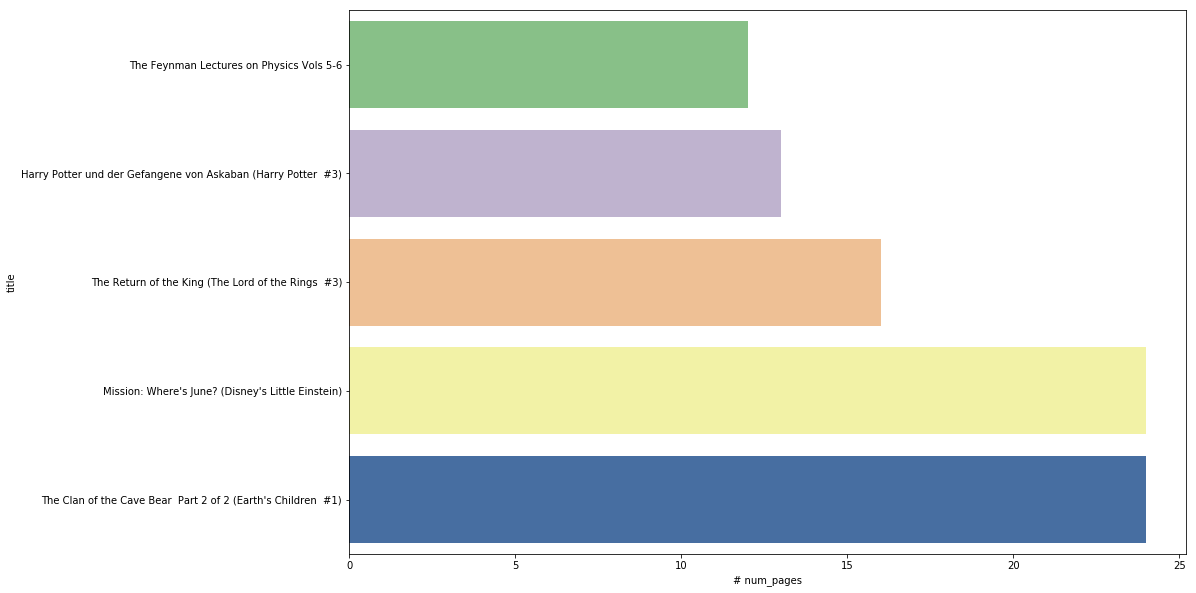

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(req['# num_pages'], req['title'], palette='Accent')

We see that The Feynman Lectures on Physics is Most Rated book with least no. of pages.

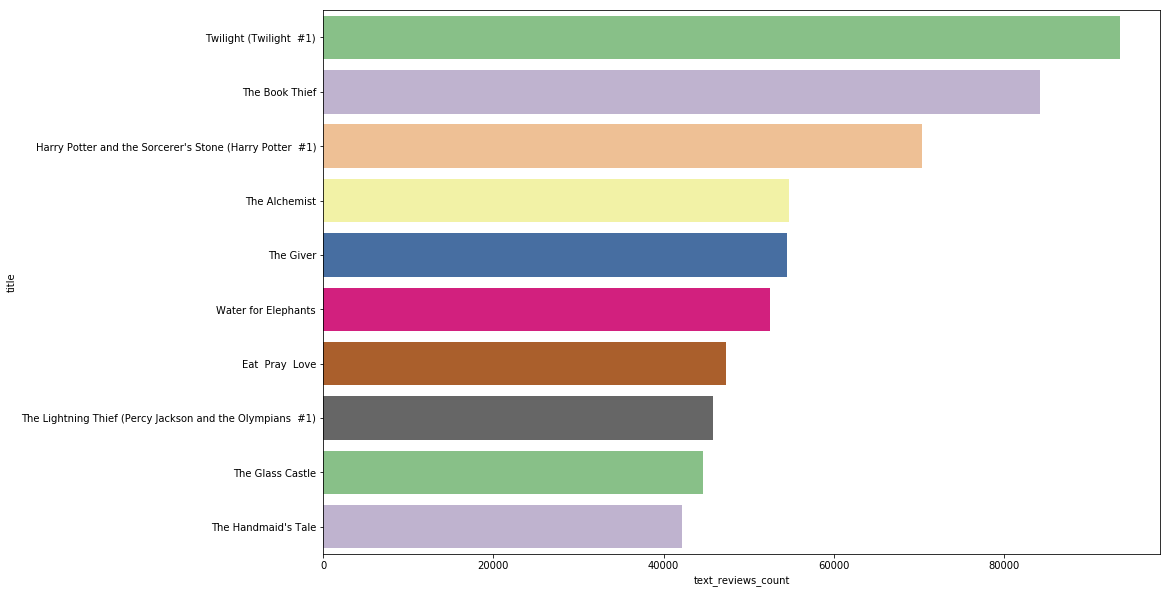

In [16]:
most_rated = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['text_reviews_count'], most_rated.index, palette='Accent')

We see that Twilight leads this Segment and Harry Potter is left far Behind

In [17]:
req = df.groupby(pd.cut(df['average_rating'], [0,1,2,3,4,5]))
req = req[['ratings_count']]
req.sum().reset_index()

,average_rating,ratings_count
0,"(0, 1]",3
1,"(1, 2]",13
2,"(2, 3]",66474
3,"(3, 4]",115038407
4,"(4, 5]",128529761


We observe that Books with low rating have Less no. of Readers